In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Input
from tensorflow.keras.regularizers import l1, l2
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [2]:
def remove_label(df, label):
    x = df.drop(label, axis=1)
    y = df[label].copy()
    return (x,y)

In [7]:
true_news = pd.read_csv("C:/Users/Sirisha/Desktop/pinnacle/True.csv")
fake_news = pd.read_csv("C:/Users/Sirisha/Desktop/pinnacle/Fake.csv")

In [8]:
true_news

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [9]:
fake_news

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [10]:
true_news.isna().any()

title      False
text       False
subject    False
date       False
dtype: bool

In [11]:
fake_news.isna().any()

title      False
text       False
subject    False
date       False
dtype: bool

Fake = 0, True = 1

In [12]:
true_news['class'] = 1
fake_news['class'] = 0

Combining true_new and fake_news into one data base

In [13]:
df = pd.concat([true_news, fake_news])
df

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [14]:
df = df.drop("date", axis=1)
df

,title,text,subject,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,0


In [15]:
text = df['text'].values
len(text)

44898

In [16]:
class_result = df['class'].values
len(class_result)

44898

In [17]:
x_train, x_val, y_train, y_val = train_test_split(text, class_result, test_size=0.3, random_state=42, shuffle=True, stratify=None)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.2, random_state=42, shuffle=True, stratify=None)

In [18]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(text)

In [19]:
x_train = tokenizer.texts_to_sequences(x_train)
x_train = pad_sequences(x_train, maxlen=500)
x_val = tokenizer.texts_to_sequences(x_val)
x_val = pad_sequences(x_val, maxlen=500)
x_test = tokenizer.texts_to_sequences(x_test)
x_test = pad_sequences(x_test, maxlen=500)

In [20]:
print(len(x_test) + len(x_train) + len(x_val))

44898


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Dropout, Input, Bidirectional, Conv1D, MaxPooling1D, BatchNormalization
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
tokenizer = Tokenizer(num_words=10000)  # Adjust num_words to match the actual vocabulary size
tokenizer.fit_on_texts(text)
word_index = tokenizer.word_index

# Convert text to sequences
x_sequences = tokenizer.texts_to_sequences(text)

# Define the maximum sequence length
max_sequence_length = 500

# Pad sequences to ensure consistent input length
x_padded = pad_sequences(x_sequences, maxlen=max_sequence_length)

# Split data into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(x_padded, class_result, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# One-hot encode the labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

# Ensure the labels are one-hot encoded
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Build the model
model = Sequential()
model.add(Input((x_train.shape[1],)))
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100))  # Adjust input_dim based on word index size
model.add(SpatialDropout1D(0.2))

# Adding Convolutional and MaxPooling layers
model.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=4))

# Adding Bidirectional LSTM layers
model.add(Bidirectional(LSTM(150, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))

# Adding Batch Normalization for improved training
model.add(BatchNormalization())

model.add(Dense(50, activation='relu', kernel_regularizer=l1(0.001)))
model.add(Dropout(0.5))
model.add(Dense(25, activation='relu', kernel_regularizer=l1(0.001)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu', kernel_regularizer=l1(0.001)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax', kernel_regularizer=l1(0.001)))  # Use softmax for multi-class classification

# Compile the model with Adam optimizer and binary cross-entropy loss
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 500, 100)       │    13,802,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ (None, 500, 100)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 500, 128)       │        64,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 125, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 125, 300)       │       334,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,534,335 (55.44 MB)

 Trainable params: 14,533,935 (55.44 MB)

 Non-trainable params: 400 (1.56 KB)

In [36]:
model.fit(x_train, y_train, epochs=1, batch_size=64, validation_data=(x_val, y_val))

492/492 ━━━━━━━━━━━━━━━━━━━━ 480s 959ms/step - accuracy: 0.6678 - loss: 1.2726 - val_accuracy: 0.9917 - val_loss: 0.2069


In [37]:
y_pred = model.predict(x_test)
y_pred = np.rint(y_pred)
y_pred

211/211 ━━━━━━━━━━━━━━━━━━━━ 28s 129ms/step


array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

Evaluating model

Accuracy: 0.9903489235337788
F1 Score: 0.9899021283206463
[[3484   39]
 [  26 3186]]


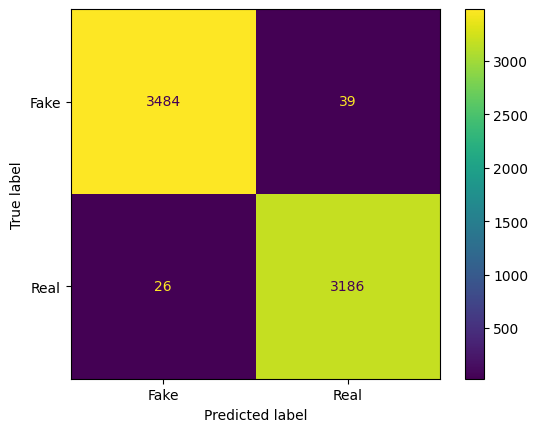

In [41]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Convert one-hot encoded arrays to label arrays
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute accuracy and F1 score
accuracy = accuracy_score(y_test_labels, y_pred_labels)
f1 = f1_score(y_test_labels, y_pred_labels)
print("Accuracy: {0}".format(accuracy))
print("F1 Score: {0}".format(f1))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
print(conf_matrix)

# Plot confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Fake', 'Real']).plot()
plt.show()


In [68]:
def predict_news(text):
    processed_text = tokenizer.texts_to_sequences([text])
    padded_text = pad_sequences(processed_text, maxlen=500)
    prediction = model.predict(padded_text)
    label = np.rint(prediction)[0][0]
    if label == 0:
        return "Fake"
    else:
        return "Real"

# Example usage
user_input = input("Enter a news article: ")
prediction = predict_news(user_input)
print("The news article is predicted to be:", prediction)

Enter a news article:  "NASA's Perseverance Rover has successfully landed on Mars, marking a significant milestone in space exploration. The rover, which traveled more than 290 million miles over nearly seven months, touched down on the red planet at around 3:55 PM EST on Thursday. The mission aims to search for signs of ancient life and collect samples of rock and regolith for potential return to Earth. This achievement demonstrates the remarkable advancements in technology and human ingenuity."


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
The news article is predicted to be: Real
